<a href="https://colab.research.google.com/github/lianmega/PVCK_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lian Mega Pratiwi - 2041720257

Praktikum

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Histogram Citra

<BarContainer object of 256 artists>

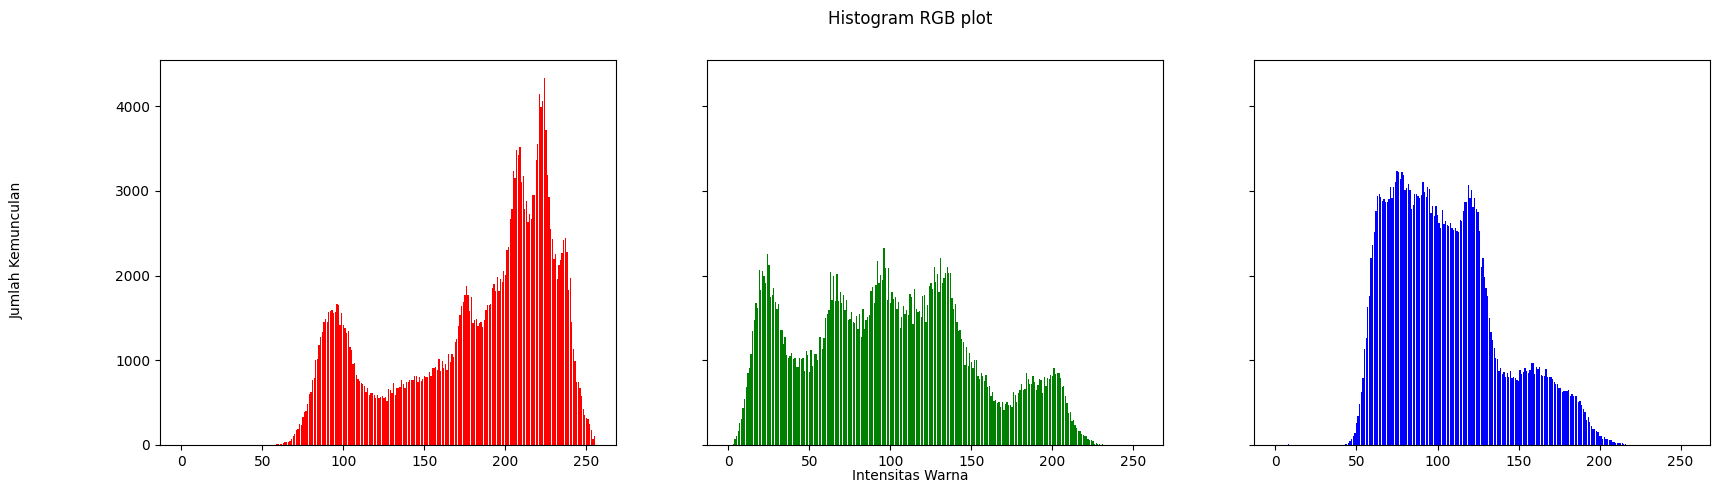

In [4]:
img_bgr = cv.imread('/content/drive/MyDrive/PCVK/Lenna_(test_image).png') # Read Image
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB) # Convert BGR to RGB
height, width, depth = np.shape(img_rgb) # Variabel height, width, dan depth. Digunakan pada looping
histogram = np.arange(256) # Pembuatan range dari yang berhenti di nilai 256

# Inisialisasi Variabel Histogram
red = [0] * 256
green = [0] * 256
blue = [0] * 256

# Looping untuk memeriksa pixel += 1
for y in range(0, height):
  for x in range(0, width):
    red[img_rgb[y][x][0]] += 1
    green[img_rgb[y][x][1]] += 1
    blue[img_rgb[y][x][2]] += 1

# Pembuatan Histogram
fig, axs = plt.subplots(1, 3, figsize = [20, 5], sharex = True, sharey = True)
fig.suptitle('Histogram RGB plot') # Judul
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va = 'center', rotation = 'vertical') # Sumbu y
fig.text(0.5, 0.04, 'Intensitas Warna', ha = 'center') # Sumbu x

# Output Histogram
axs[0].bar(histogram, red, color='red')
axs[1].bar(histogram, green, color='green')
axs[2].bar(histogram, blue, color='blue')

4. Numpy

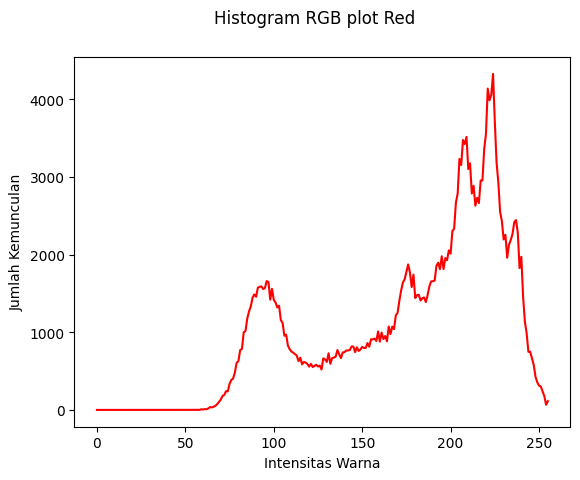

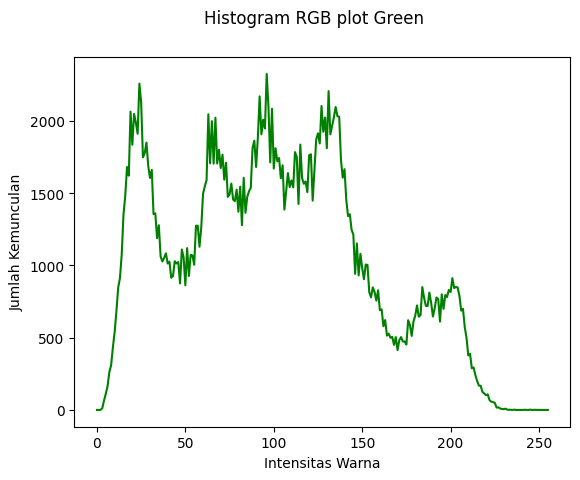

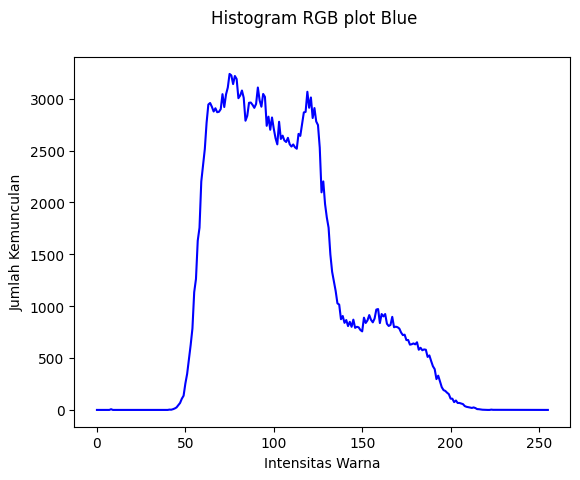

In [5]:
img_bgr = cv.imread('/content/drive/MyDrive/PCVK/Lenna_(test_image).png') # Read Image
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB) # Convert BGR to RGB

# Penggunaan np.histogram dari NumPy
red, bins = np.histogram(img_rgb[:, :, 0], bins = 256, range = (0, 256))
green, bins = np.histogram(img_rgb[:, :, 1], bins = 256, range = (0, 256))
blue, bins = np.histogram(img_rgb[:, :, 2], bins = 256, range = (0, 256))

# Histogram R
plt.suptitle('Histogram RGB plot Red')
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.plot(bins[0: -1], red, color = "r")
plt.show()

# Histogram G
plt.suptitle('Histogram RGB plot Green')
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.plot(bins[0 : -1], green, color = "g")
plt.show()

# Histogram B
plt.suptitle('Histogram RGB plot Blue')
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.plot(bins[0 : -1], blue, color = "b")
plt.show()

5. Histogram equalization

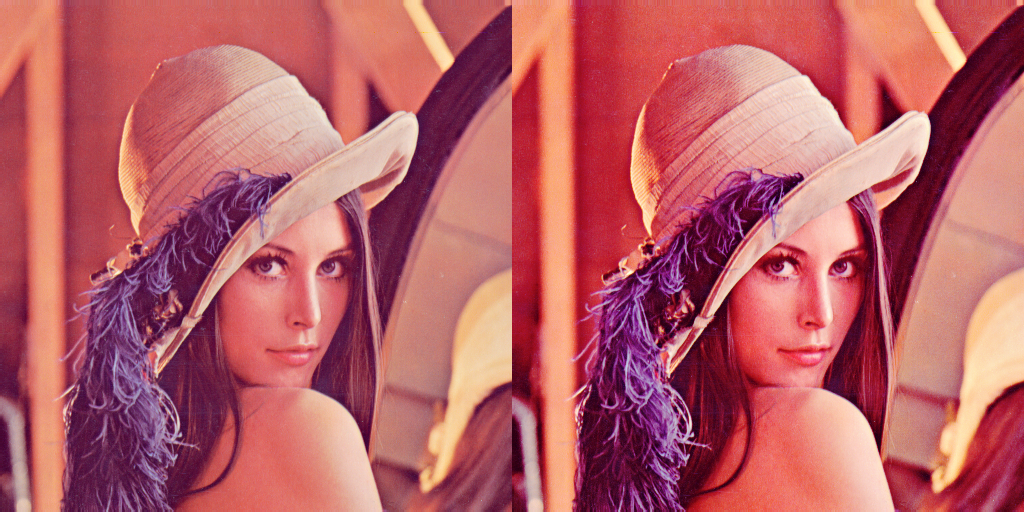

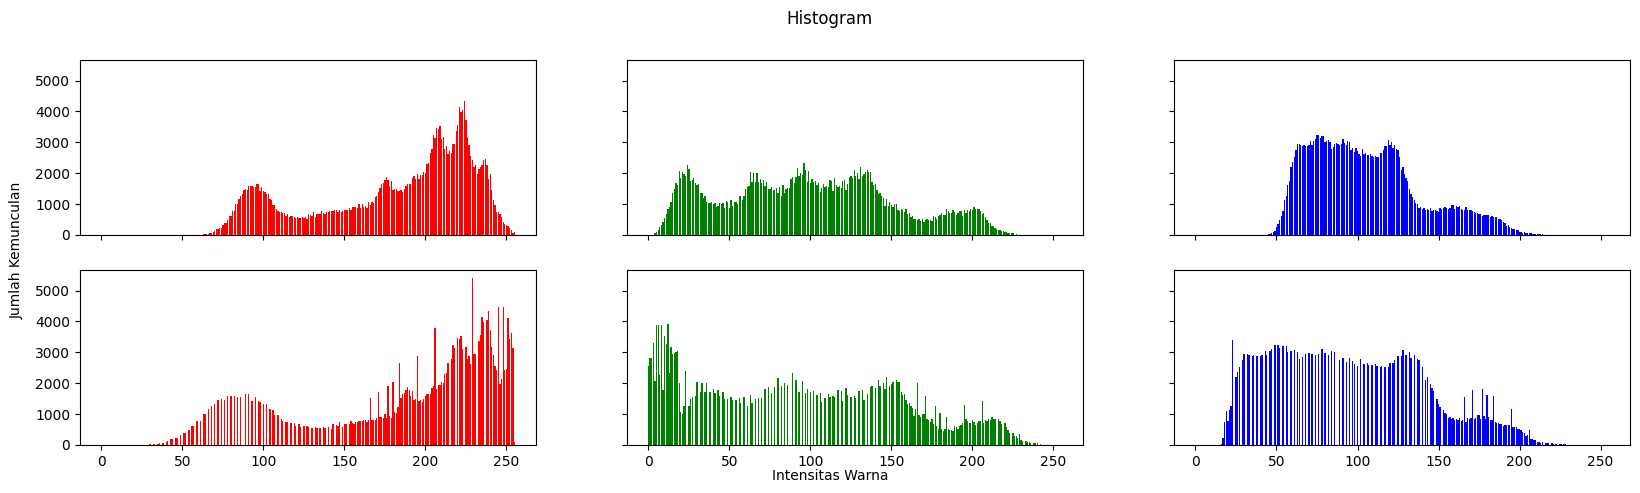

In [10]:
img1 = cv.imread('/content/drive/MyDrive/PCVK/Lenna_(test_image).png')
# Fungsi untuk menghitung jumlah kemunculan setiap pixel warna pada nilai tertentu (Frekuensi)
def histog(img1):
    height, width, depth = np.shape(img1)
    ax = np.zeros((3, 256))  # Inisialisasi matriks untuk histogram
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img1[y][x][0]] += 1  # Hitung frekuensi warna untuk channel biru
            ax[1][img1[y][x][1]] += 1  # Hitung frekuensi warna untuk channel hijau
            ax[2][img1[y][x][2]] += 1  # Hitung frekuensi warna untuk channel merah
    return ax

# Menghitung histogram citra asli
histo_asli = histog(img1)

# Mengubah citra ke bentuk array Numpy
img_array = np.asarray(img1)

# Step 1: Normalized cumulative histogram
# Menghitung histogram kumulatif yang dinormalisasi
histogram_array = np.bincount(img_array.flatten(), minlength=256)
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels
chistogram_array = np.cumsum(histogram_array)

# Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

# Step 3: Transformation
# Melakukan transformasi citra menggunakan lookup table
img_list = list(img_array.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

# Menghitung histogram citra hasil equalisasi
equal_histo = histog(img2)

# Menggabungkan citra asli dan citra hasil equalisasi
final_frame = cv.hconcat((img1, img2))
cv2_imshow(final_frame)

# Menampilkan histogram citra asli dan hasil equalisasi
names = np.arange(256)
blue = [0] * 256
green = [0] * 256
red = [0] * 256

# Membuat plot histogram
fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0, 0].bar(names, histo_asli[2], color='red')
axs[0, 1].bar(names, histo_asli[1], color='green')
axs[0, 2].bar(names, histo_asli[0], color='blue')
axs[1, 0].bar(names, equal_histo[2], color='red')
axs[1, 1].bar(names, equal_histo[1], color='green')
axs[1, 2].bar(names, equal_histo[0], color='blue')

plt.show()  # Menampilkan plot histogram

6. Histogram equalizeHist

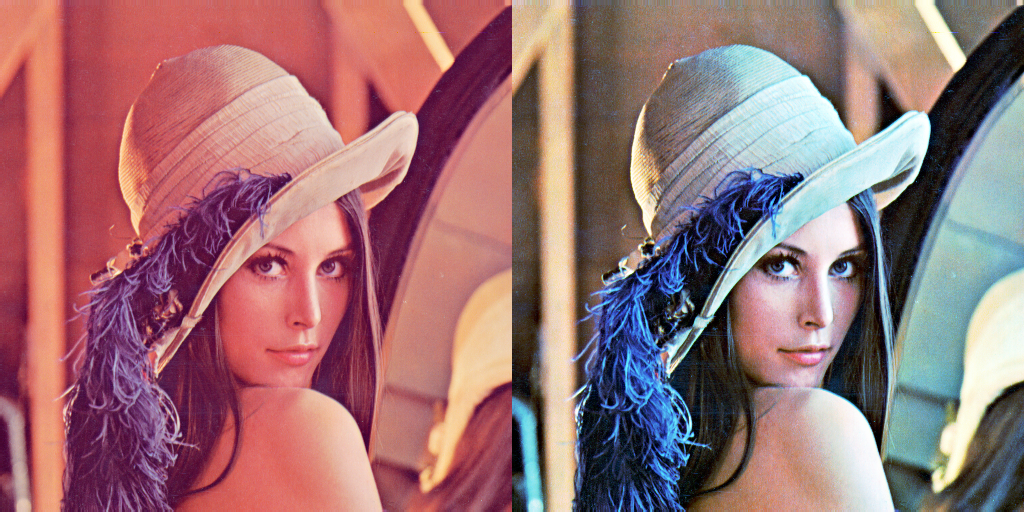

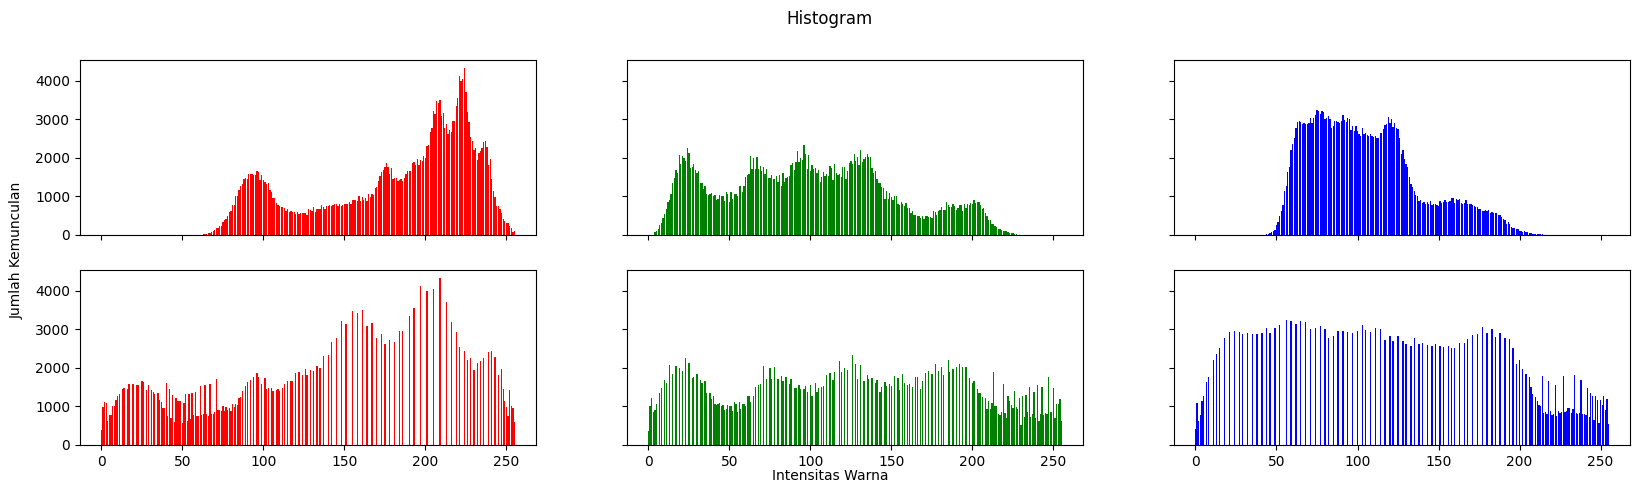

In [11]:
channels = cv.split(img1)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))

eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)

# Membuat plot histogram
fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0, 0].bar(names, histo_asli[2], color='red')
axs[0, 1].bar(names, histo_asli[1], color='green')
axs[0, 2].bar(names, histo_asli[0], color='blue')
axs[1, 0].bar(names, equal_histo[2], color='red')
axs[1, 1].bar(names, equal_histo[1], color='green')
axs[1, 2].bar(names, equal_histo[0], color='blue')

plt.show()  # Menampilkan plot histogram

7. Pemetaan RGB ke 8 warna

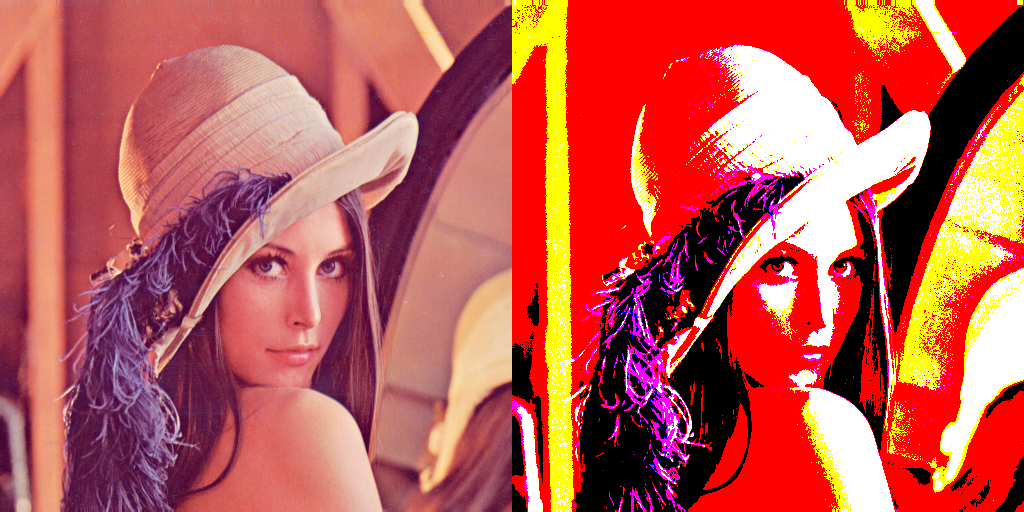

In [12]:
lena4 = cv.imread('/content/drive/MyDrive/PCVK/Lenna_(test_image).png')

def pemetaan (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1 # Menginisialisasi variabel minDistance
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]] # Palet warna yang akan digunakan untuk pemetaan
  for i in range(len(warnaPallette)): # Melakukan iterasi pada palet warna
    rDiff = r - warnaPallette[i][0] # Menghitung perbedaan komponen
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff * rDiff + gDiff * gDiff + bDiff * bDiff
    if (distance < minDistance):
      minDistance = distance  # Mengupdate jarak minimum
      pValue = i # Mengupdate nilai pValue (indeks warna terdekat)
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16_warna = cv.cvtColor(lena4, cv.COLOR_BGR2RGB)
img_8_warna = np.zeros(img_16_warna.shape, img_16_warna.dtype)

for y in range(0, img_16_warna.shape[0]):
  for x in range(0, img_16_warna.shape[1]):
    img_after = pemetaan(img_16_warna[y, x, 0], img_16_warna[y, x, 1], img_16_warna[y, x, 2])
    img_8_warna[y, x] = warnaPallette[img_after]

img_16_warna = cv.cvtColor(img_16_warna, cv.COLOR_BGR2RGB)
img_8_warna = cv.cvtColor(img_8_warna, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16_warna, img_8_warna))
cv2_imshow(final_frame)

8. Dithering floyd and steinberg

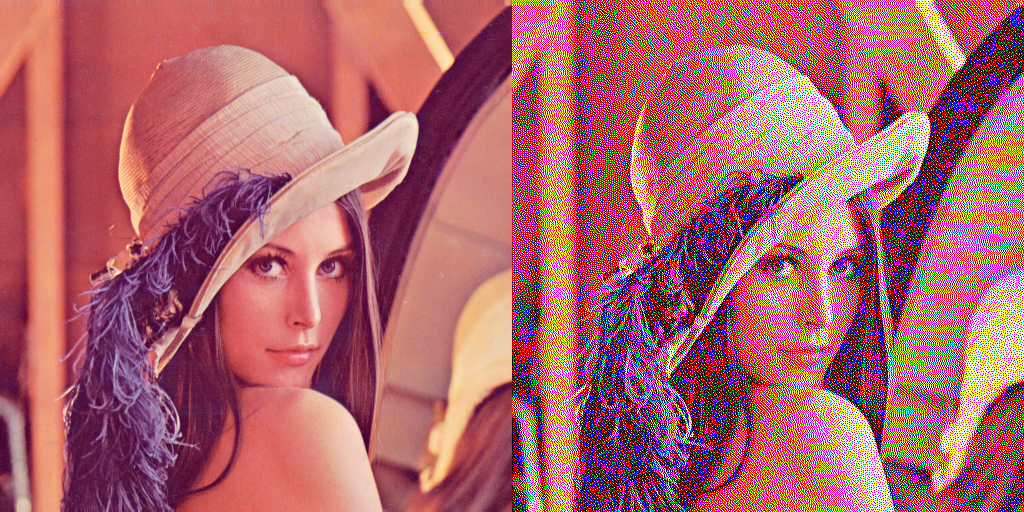

In [13]:
img2 = cv.imread('/content/drive/MyDrive/PCVK/Lenna_(test_image).png')

def floyd_steinberg_dithering(image):

  tinggi = image.shape[0]
  lebar = image.shape[1]
  channel = image.shape[2]
  jarak_pixel = 1

  # Looping setiap pixel citra
  for y in range(tinggi):
    for x in range(lebar):
      for c in range(channel):
        # Jarak pixel tetangga
        pixel_old = image[y, x, c]

        # Menghitung pixel baru berdasar jarak dan juga batasan warna yang dimiliki
        pixel_new = np.round((jarak_pixel * pixel_old) / 255.0) * (255 / jarak_pixel)

        image[y, x, c] = pixel_new

        error = pixel_old - pixel_new

        # Lakukan untuk semua channel warna
        # Implementasi rumus dithering Floyd and Steinberg (R1-R4)
        if x + 1 < lebar:
          image[y, x + 1, c] = threshold(image[y, x + 1, c] + error * 7/16)
        if y + 1 < tinggi:
          if x - 1 >= 0:
            image[y + 1, x - 1, c] = threshold(image[y + 1, x - 1, c] + error * 3/16)
          image[y + 1, x, c] = threshold(image[y + 1, x, c] + error * 5/16)
          if x + 1 < lebar:
            image[y + 1, x + 1, c] = threshold(image[y + 1, x + 1, c] + error * 1/16)

  return image

def threshold(nilai_warna):
  if nilai_warna > 255:
    nilai_warna = 255
  elif nilai_warna < 0:
    nilai_warna = 0

  return nilai_warna

img3 = np.copy(img2)

dithering_image = floyd_steinberg_dithering(img3)
final_frame = cv.hconcat((img2, dithering_image))
cv2_imshow(final_frame)

9. Rubah menjadi grey image

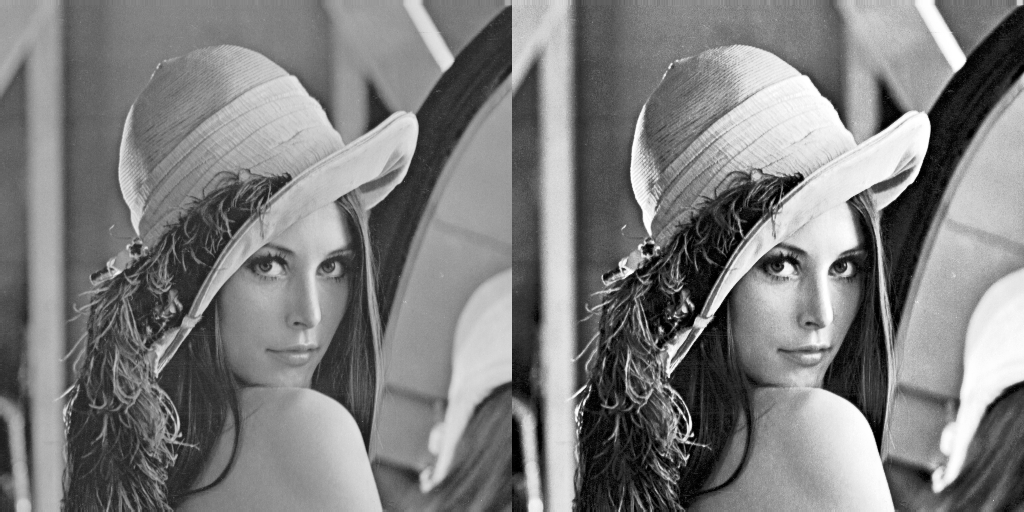

In [14]:
img = cv.imread('/content/drive/MyDrive/PCVK/Lenna_(test_image).png')

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img_gray_1 = np.copy(img_gray)

equalized_img = cv.equalizeHist(img_gray_1)

final_frame = cv.hconcat((img_gray, equalized_img))
cv2_imshow(final_frame)

Histogram sebelum Equalization

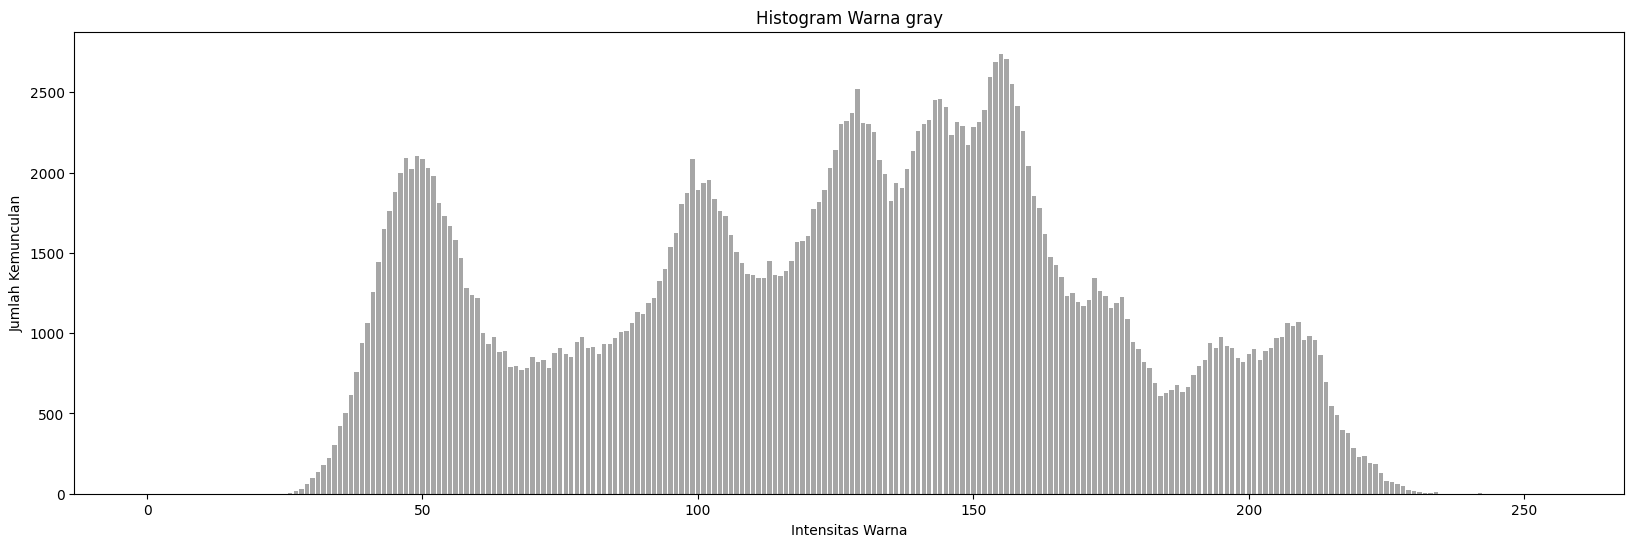

In [15]:
def histogram_gray(img):
  histogram_gray = np.zeros(256)

  # Melakukan perulangan untuk setiap piksel, kemudian di masukkan kedalam masing-masing histogram
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          pixel = img[i, j]
          histogram_gray[pixel] += 1

  plt.figure(figsize=(20, 6))
  plt.bar(range(256), histogram_gray, color='gray', alpha=0.7)
  plt.title(f'Histogram Warna gray')
  plt.xlabel('Intensitas Warna')
  plt.ylabel('Jumlah Kemunculan')
  plt.show()

histogram_gray(img_gray)

Setelah Equalization

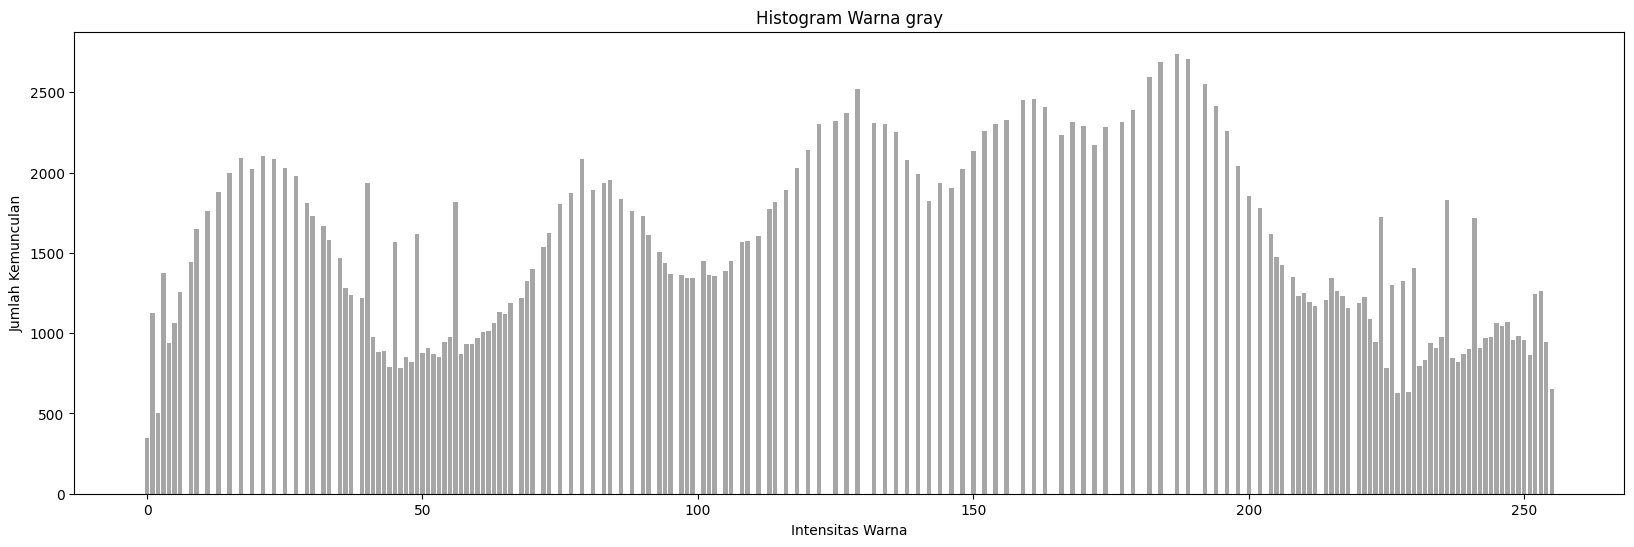

In [16]:
# Hasil Histogram setelah dilakukan equalization
histogram_gray(equalized_img)

Implementasi proses dithering Floyd and Steinberg

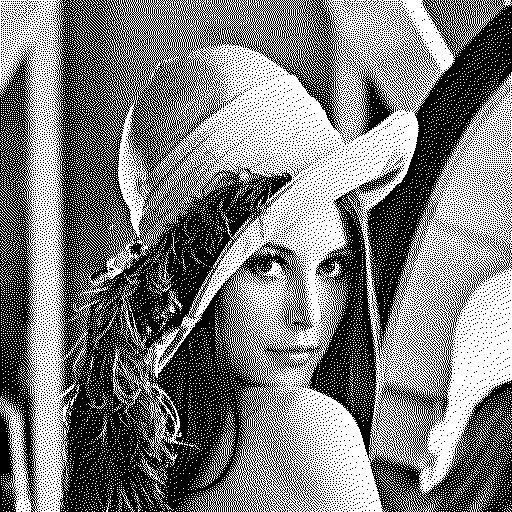

In [17]:
# Floyd-Steinberg Dithering

def floyd_steinberg_dithering_gray(image):

  tinggi = image.shape[0]
  lebar = image.shape[1]
  jarak_pixel = 1

  # Looping setiap pixel citra
  for y in range(tinggi):
    for x in range(lebar):
      # Jarak pixel tetangga
      pixel_old = image[y, x]

      # Menghitung pixel baru berdasar jarak dan juga batasan warna yang dimiliki
      pixel_new = np.round((jarak_pixel * pixel_old) / 255.0) * (255 / jarak_pixel)

      image[y, x] = pixel_new

      error = pixel_old - pixel_new

      # Lakukan untuk semua channel warna
      # Implementasi rumus dithering Floyd and Steinberg (R1-R4)
      if x + 1 < lebar:
        image[y, x + 1] = threshold(image[y, x + 1] + error * 7/16)
      if y + 1 < tinggi:
        if x - 1 >= 0:
          image[y + 1, x - 1] = threshold(image[y + 1, x - 1] + error * 3/16)
        image[y + 1, x] = threshold(image[y + 1, x] + error * 5/16)
        if x + 1 < lebar:
          image[y + 1, x + 1] = threshold(image[y + 1, x + 1] + error * 1/16)

  return image

dithering_image = floyd_steinberg_dithering_gray(equalized_img)
cv2_imshow(dithering_image)